<a href="https://colab.research.google.com/github/Mohd-Talha0/MLP/blob/main/Week_9_assignments.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.datasets import load_wine

In [2]:
X, y = load_wine(return_X_y=True)

In [3]:
X.shape, y.shape

((178, 13), (178,))

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [5]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [6]:
criterion = ['entropy', 'gini']
splitter = ['random', 'best']
min_samples_leaf = [2,4,6,8,10]
max_depth = [3,4,5,6]

param_grid={'criterion': criterion, 'splitter': splitter, 'min_samples_leaf': min_samples_leaf, 'max_depth': max_depth}

dt_classifier = DecisionTreeClassifier(random_state=1)
clf = GridSearchCV(dt_classifier, param_grid=param_grid, cv=4, return_train_score=True)
clf.fit(X_train, y_train)

GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=1),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [3, 4, 5, 6],
                         'min_samples_leaf': [2, 4, 6, 8, 10],
                         'splitter': ['random', 'best']},
             return_train_score=True)

- Find a way to find out the best **max_depth** of the model after training with GridSearchCV.
- Find a way to find best **min_samples_leaf** of the model after training with GridSearchCV

In [7]:
clf.best_estimator_

DecisionTreeClassifier(max_depth=4, min_samples_leaf=2, random_state=1)

In [8]:
clf.cv_results_['mean_test_score'].mean()

0.84375

In [9]:
clf_best = clf.best_estimator_
clf_best.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, min_samples_leaf=2, random_state=1)

In [10]:
print(clf_best.score(X_test, y_test))

0.9074074074074074


# - **Q4-7**

In [12]:
from sklearn.datasets import load_diabetes
X, y = load_diabetes(return_X_y=True)
X.shape, y.shape

((442, 10), (442,))

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [14]:
from sklearn.tree import DecisionTreeRegressor

In [15]:
dt_classifier = DecisionTreeRegressor(criterion='squared_error', splitter='random', max_leaf_nodes=10, random_state=1)
dt_classifier.fit(X_train, y_train)

DecisionTreeRegressor(max_leaf_nodes=10, random_state=1, splitter='random')

In [16]:
dt_classifier.score(X_train, y_train)

0.5032060624566737

In [17]:
dt_classifier.score(X_test, y_test)

0.218771375137222

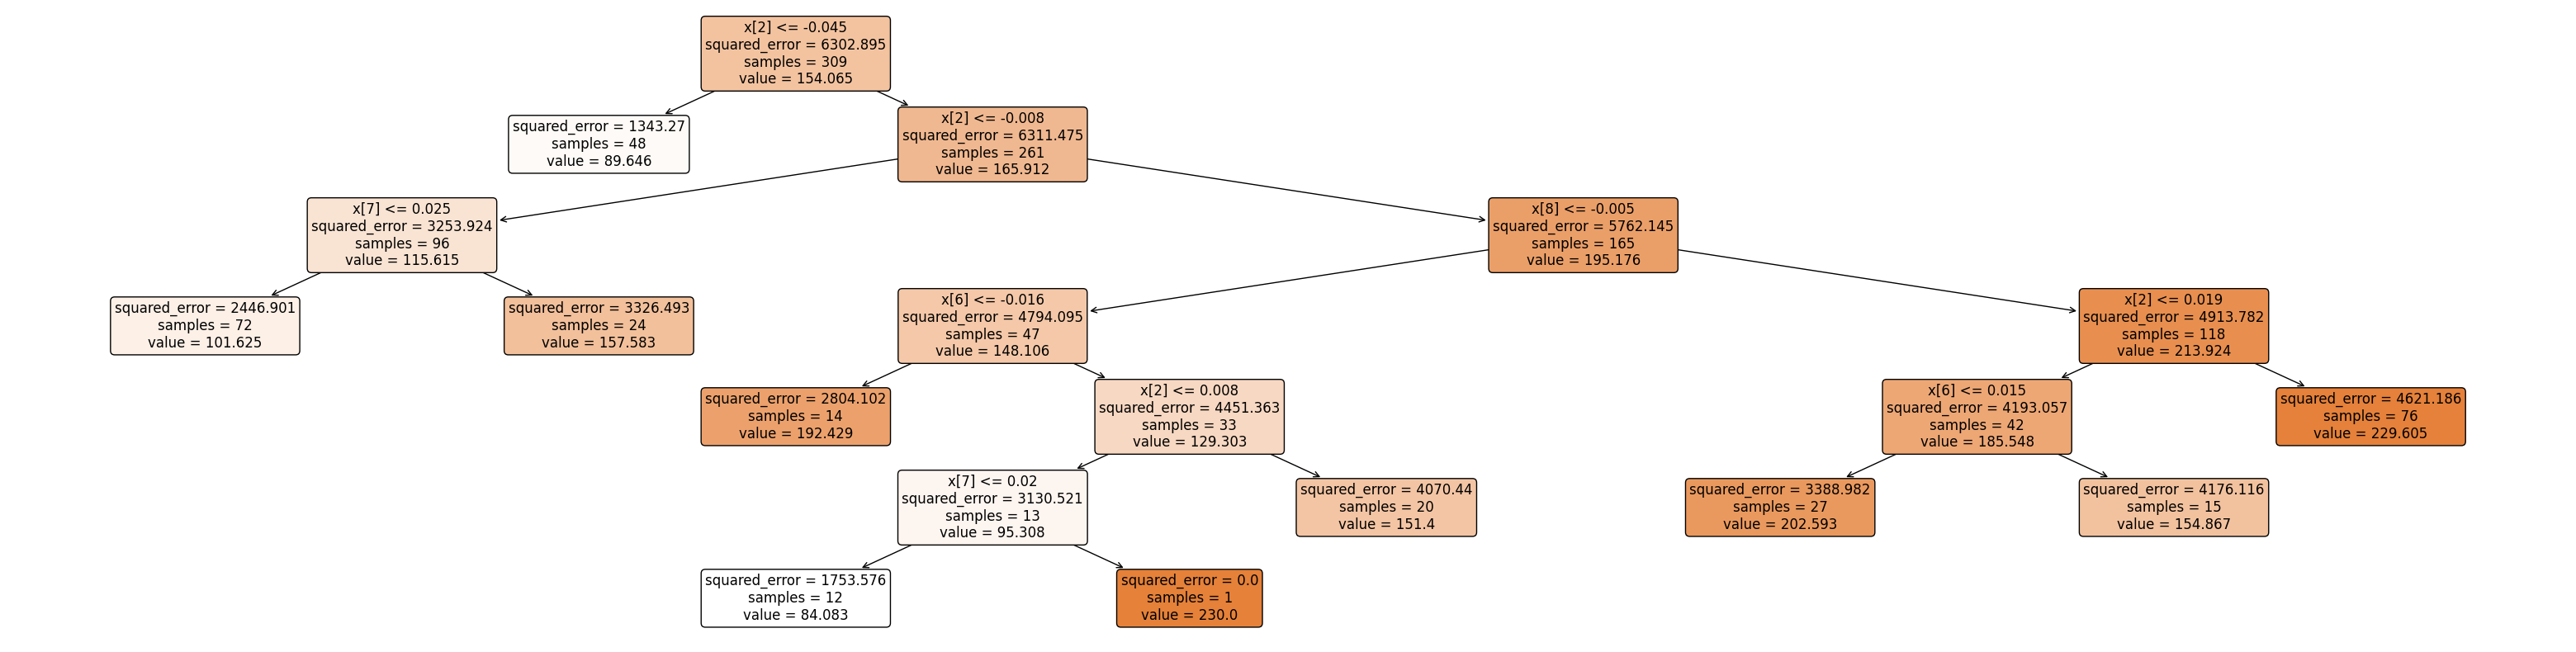

In [18]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plt.figure(figsize=(40, 10))
t = plot_tree(dt_classifier, filled=True, rounded=True, fontsize=12)
plt.show()

In [19]:
ratio = 48/261
print(ratio)

0.1839080459770115


# **Q 8 -10**

In [20]:
from sklearn.datasets import load_diabetes
X, y = load_diabetes(return_X_y=True)
X.shape, y.shape

((442, 10), (442,))

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [28]:
from sklearn.tree import DecisionTreeRegressor

In [29]:
criterion = ['squared_error', 'friedman_mse', 'absolute_error', 'poisson']
splitter = ['random', 'best']
max_features = ['auto','sqrt', 'log2']
ccp_alpha = [0.001,0.01,0.02,0.05]

param_grid = {'criterion': criterion, 'splitter': splitter, 'max_features': max_features, 'ccp_alpha': ccp_alpha}

dt_regressor = DecisionTreeRegressor(max_depth=4, random_state=1)
clf = GridSearchCV(dt_regressor, param_grid=param_grid, cv=4, return_train_score=True)
clf.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.10/di

GridSearchCV(cv=4, estimator=DecisionTreeRegressor(max_depth=4, random_state=1),
             param_grid={'ccp_alpha': [0.001, 0.01, 0.02, 0.05],
                         'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson'],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['random', 'best']},
             return_train_score=True)

In [30]:
clf.cv_results_['mean_test_score'].mean()

0.2972153098939698

In [31]:
clf_best = clf.best_estimator_
clf_best.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


DecisionTreeRegressor(ccp_alpha=0.05, criterion='poisson', max_depth=4,
                      max_features='auto', random_state=1)

In [32]:
clf_best.score(X_test, y_test)

0.1223013699342489

In [33]:
clf.best_params_

{'ccp_alpha': 0.05,
 'criterion': 'poisson',
 'max_features': 'auto',
 'splitter': 'best'}